**Workshop 1**

Mariana Castro Payns - 
A01706038

09/08/2022

**Estadistica Discreta**

Es usada para resumir informarcion del raw data de cualquier fenomeno, usualmente dan una idea general del fenomeno. 
Las más importantes son: medidas de tendencia central y medidas de dispersión.

***2.1 Medidas de tendencia central***

Las principales medidas son: Promedio aritmetico, Mediana, Moda.



> 2.1.1 Promedio aritmetico

Es una simple medida que nos dice el valor promedio de todos los valores validoa de X. 



> 2.1.2 Mediana

La mediana de una variable es su 50 porciento, que es el punto medio de los valores. 



> 2.1.3 Moda

Es el valore que mas aparece en la variable. 

***2.2 Varianza y Desviacion Estandar***

Son usadas para medir que tanto en promedio de loas valores individuales de una variable cambian del promedio. 

***2.3 CHALLENGE: Data Managmente and Descriptive Statistics***

*Actualizacion de librerias para su utilizacion*

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***2.3.1 Recoleccion de datos y visualizacion***

*Importar Librerias de Python*

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

*Descargar los precios diarios de Bitcoin del 2017*

In [3]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

*Mostrar Contenido*

In [4]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578


*Mostrar las ultimas columnas*

In [5]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24822.628906,23900.996094,23948.345703,23957.529297,37127036580,23957.529297
2022-08-12,24078.126953,23680.998047,23966.562500,23788.650391,30610481152,23788.650391


*- para las series de Bitcoin podemos utilizar el close price para calcular el daily return*

*- Importar Matplotlib y hacer una grafica para los closing prices de Bitcoin*

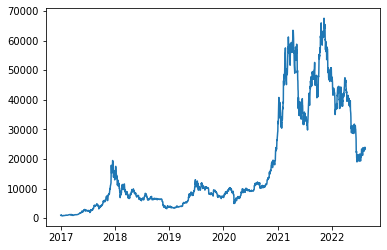

In [6]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

*Checar los tipos de dato de cada variable en el dataset*

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2050 entries, 2017-01-01 to 2022-08-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2050 non-null   float64
 1   Low        2050 non-null   float64
 2   Open       2050 non-null   float64
 3   Close      2050 non-null   float64
 4   Volume     2050 non-null   int64  
 5   Adj Close  2050 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.1 KB


***2.3.2 Data Transformations***

*Obtener el valor anterior de la variable empleando shift(n)*

In [8]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.000413
2022-08-12   -0.007049
Name: R, Length: 2050, dtype: float64


*Calcular cc returns en una nueva columna*

In [9]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

*Tenemos valor nulo del prime dia ya que no podemos calcular returns del día uno*

In [10]:
BTC= BTC.dropna()

***2.2.2.4 Descriptive statistics of returns***

In [11]:
sumret = BTC["R"].describe()
sumret

count    2049.000000
mean        0.002411
std         0.041359
min        -0.371695
25%        -0.015882
50%         0.002216
75%         0.020916
max         0.252472
Name: R, dtype: float64

*Para saber que días fueron los peores hacemos una seleccion basada en una condicion*

In [12]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


*Para saber los mejores dias*

In [13]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


*Tambien se pude obtener la estadistica descriptiva usando funciones especificas*

In [14]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015475280550252043
The daily variance of Bitcoin is  0.0017364375364406427
The daily standard deviation (volatility) of Bitcoin return is  0.04167058358651391
The daily median return of Bitcoin is  0.0022137248439948465


**Histograma**

El histograma fue inventado para ilustrar como los valores de una variable random sondistribuidos en un rango completo de valores.

Los rangos de valores de una variable que son mas frecuentes tendran una barra vertical mas alta comparada con los rangos menos frecuentes. 

Con el histograma es posible apreciar cuales son los valores mas comunes, los menos comunes, la posible mediana y la desviacion estandar. 

***3.1 CHALLENGE: Histogram***

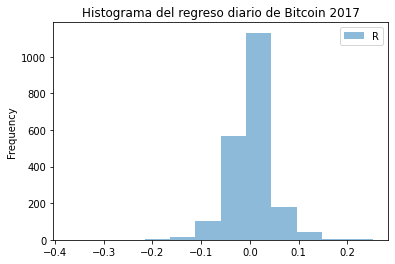

In [15]:
bitcoin_r = pd.DataFrame(BTC[["R"]])
histo = bitcoin_r.plot.hist(bins = 12, alpha = 0.5, title = "Histograma del regreso diario de Bitcoin 2017")

*PARA ESTE CASO EL REGRESO DIARIO DEL BITCOIN EN EL AÑO 2017, POR MEDIO DEL HISTOGRAMA INDICA QUE, LA MAYOR FRECUENCIA FUE ARRIBA DE LOS 1000 EN REGRESOS DE APROXIMADAMENTE 0.0 Y 0.05, LA SEGUNDA MAYOR FRECUENCIA FUE DE 600 EN REGRESOS DE APROX -0.05 Y 0.05, SEGUIDO DE ESTE TENEMOS UNA FRECUENCIA DE 100 PARA REGRESOS DE -0.1 A -0.05, POR ÚLTIMO SE TIENEN LAS FRECUENCIAS MENORES A 100 EN REGRESOS DE ENTRE 0.15 Y 0.1 Y -0.15 Y -0.1.*

*ANALIZADO ESTO PODEMOS DECIR QUE EL REGRESO DE BITCOIN QUE MAS SE REPITIO DIARIAMENTE FUE DE ENTRE 0.0 Y 0.1, CON UNA FRECUENCIA DE MMAS DE 1000 DIAS*

***5.2 CHALLENGE: Simular la distribucion normal***

*Creacion y definicion de variables para graficacion*



*Graficacion*

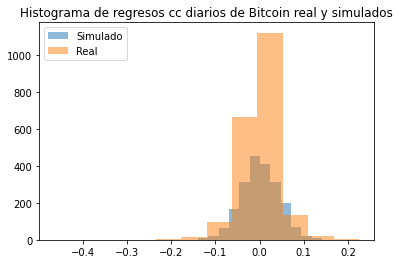

In [19]:
from matplotlib import pyplot

mean = BTC["r"].mean()
std = BTC["r"].std()
x = np.random.normal(loc = mean, scale = std, size = 2050)
cc = pd.DataFrame(BTC[["r"]])
cc_ret = cc.to_numpy()

pyplot.hist(x, bins = 12, alpha = 0.5, label = 'Simulado')
pyplot.hist(cc_ret, bins = 12, alpha = 0.5, label = 'Real')
pyplot.legend(loc = 'upper left')
pyplot.title(label = 'Histograma de regresos cc diarios de Bitcoin real y simulados')
pyplot.show()

*PARA ESTE CASO DEBIDO A QUE HABLAMOS DE LA DISTRIBUCION NORMAL PODEMOS VER FACILMENTE SU FORMA DE CAMPANA ASI COMO LA DIFERENCIA ENTRE EL HISTOGRAMA DE LO REAL Y EL SIMULADO, PRINCIPALMENTE EN LOS REGRESOS CON MAYOR FRECUENCIA YA QUE, EN EL REAL LA FRECUENCIA ES MUCHO MAYOR EN UNA GRAN PROPORCION*